In [222]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
train_original = pd.read_csv(r"C:\Users\Ethan\Downloads\loan_sanction_train.csv")
train = train_original.copy()
train.head()

test_original = pd.read_csv(r"C:\Users\Ethan\Downloads\loan_sanction_test.csv")
test = test_original.copy()

## Data Exploration

In [224]:
train.shape


(614, 13)

In [225]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [226]:
distinct_values = train['Credit_History'].unique()
print(distinct_values)

[ 1.  0. nan]


## Data Exploration - Univariate Exploration

In [227]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status', ylabel='Count'>

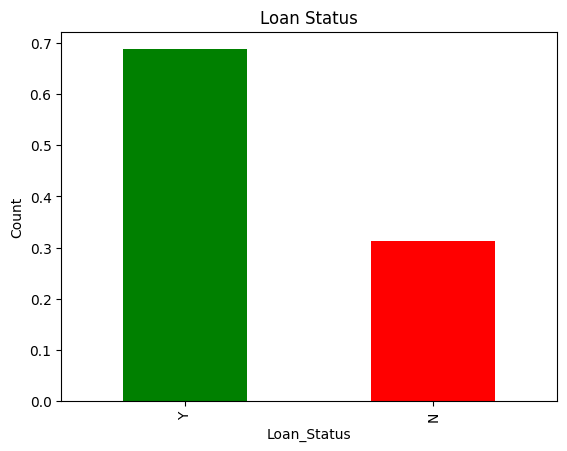

In [228]:
#Various barplots coming up: Loan status bar plot
plt.title('Loan Status')
plt.xlabel('Loan Status:Yes/No')
plt.ylabel('Count')

print(train['Loan_Status'].value_counts(normalize = True))
train['Loan_Status'].value_counts(normalize = True).plot.bar(color=['green', 'red'])

<Axes: title={'center': 'Married'}, xlabel='Married'>

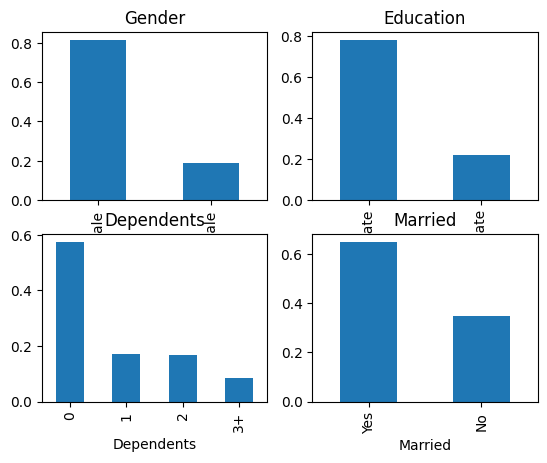

In [229]:
#Gender barplot
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Education'].value_counts(normalize = True).plot.bar(title ='Education')
plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(224)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')


<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

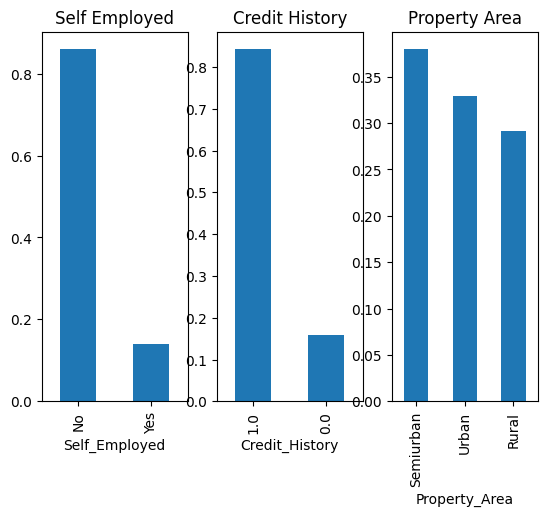

In [230]:
#More bar plots
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property Area')

c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

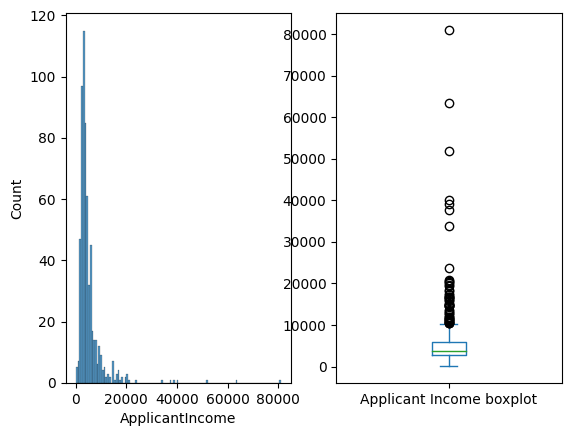

In [231]:
plt.subplot(121)
sns.histplot(train['ApplicantIncome'],label="Applicant Income distribution")
plt.subplot(122)
train['ApplicantIncome'].plot(kind='box',label="Applicant Income boxplot")

### There are a lot of outliers according to the income boxplot. Most people seem to have an income between 0 and 20,000. Let's try & see if there are any other variables that affect income:

c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

Mean ApplicantIncome for Education == Graduate: 5857.433333333333
Mean ApplicantIncome for Education == Not Graduate: 3777.283582089552


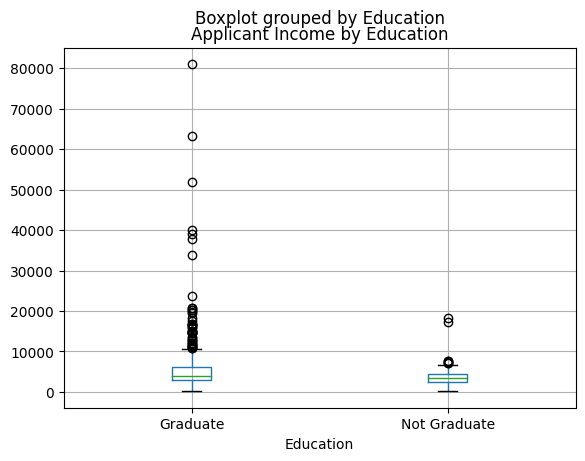

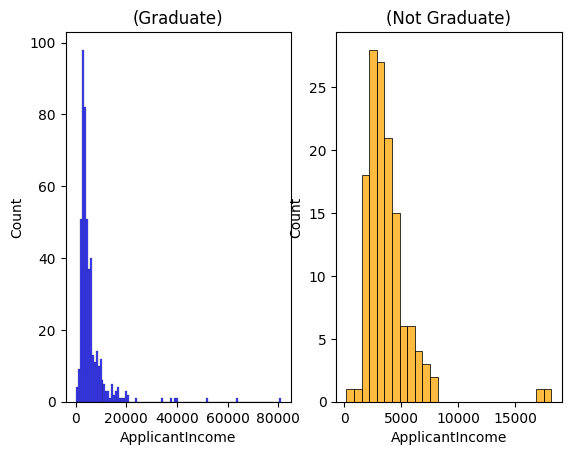

In [232]:
#Education boxplots & histograms
train.boxplot(column='ApplicantIncome',by='Education')
plt.title('Applicant Income by Education')
plt.figure()
plt.subplot(121)
sns.histplot(train[train['Education'] == 'Graduate']['ApplicantIncome'], color='blue')
plt.title('(Graduate)')
plt.subplot(122)
sns.histplot(train[train['Education'] == 'Not Graduate']['ApplicantIncome'],color='orange')
plt.title('(Not Graduate)')

mean_income_graduate = train.loc[train['Education'] == 'Graduate', 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Education == Graduate: {mean_income_graduate}')
mean_income_not_graduate = train.loc[train['Education'] == 'Not Graduate', 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Education == Not Graduate: {mean_income_not_graduate}')


c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

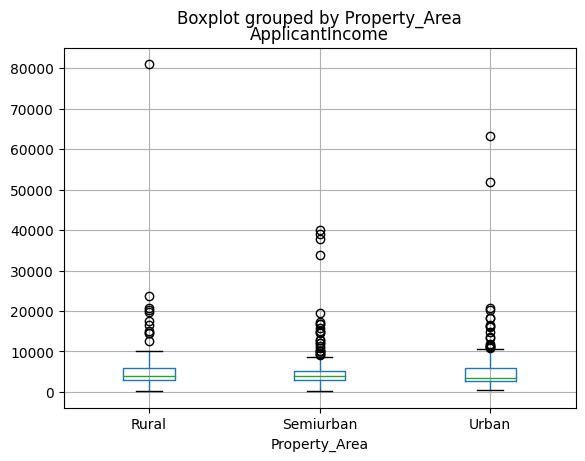

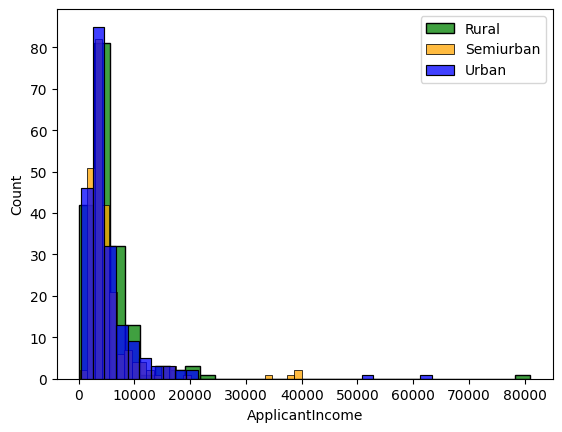

In [233]:
#Property Area boxplots & histograms
train.boxplot(column='ApplicantIncome',by='Property_Area')
plt.figure()
#plt.subplot(131)
sns.histplot(train[train['Property_Area'] == 'Rural']['ApplicantIncome'], bins=30, kde=False, color='green', label='Rural')
#plt.subplot(132)
sns.histplot(train[train['Property_Area'] == 'Semiurban']['ApplicantIncome'], bins=30, kde=False, color='orange', label='Semiurban')
#plt.subplot(133)
sns.histplot(train[train['Property_Area'] == 'Urban']['ApplicantIncome'], bins=30, kde=False, color='blue', label='Urban')
plt.legend()


Mean ApplicantIncome for Credit_History = 1: 5426.526315789473
Mean ApplicantIncome for Credit_History = 0: 5679.438202247191


c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

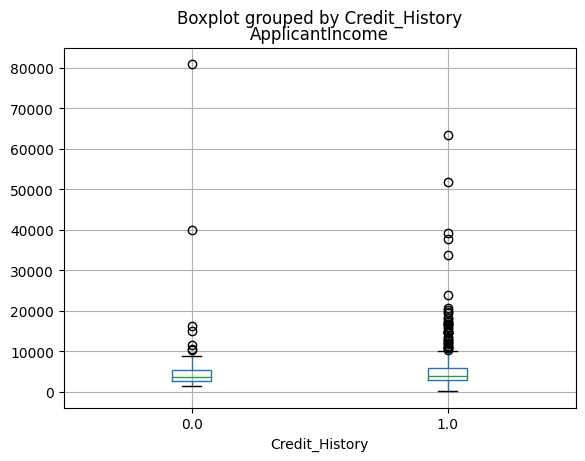

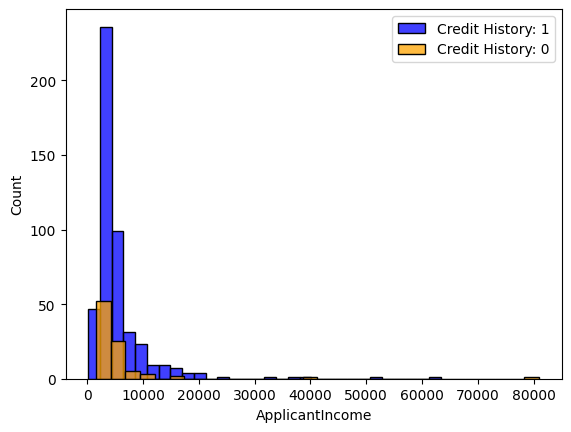

In [234]:
train.boxplot(column='ApplicantIncome',by='Credit_History')
plt.figure()
sns.histplot(train[train['Credit_History'] == 1]['ApplicantIncome'], bins=30, kde=False, color='blue', label='Credit History: 1')
sns.histplot(train[train['Credit_History'] == 0]['ApplicantIncome'], bins=30, kde=False, color='orange', label='Credit History: 0')
plt.legend()

mean_income_Credit_1 = train.loc[train['Credit_History'] == 1, 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Credit_History = 1: {mean_income_Credit_1}')
mean_income_Credit_0 = train.loc[train['Credit_History'] == 0, 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Credit_History = 0: {mean_income_Credit_0}')

## Let's see which variables have relationships with Loan_Status:

In [235]:
#Encoding Loan_Status as numerical data so we can make a correlation heatmap
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)


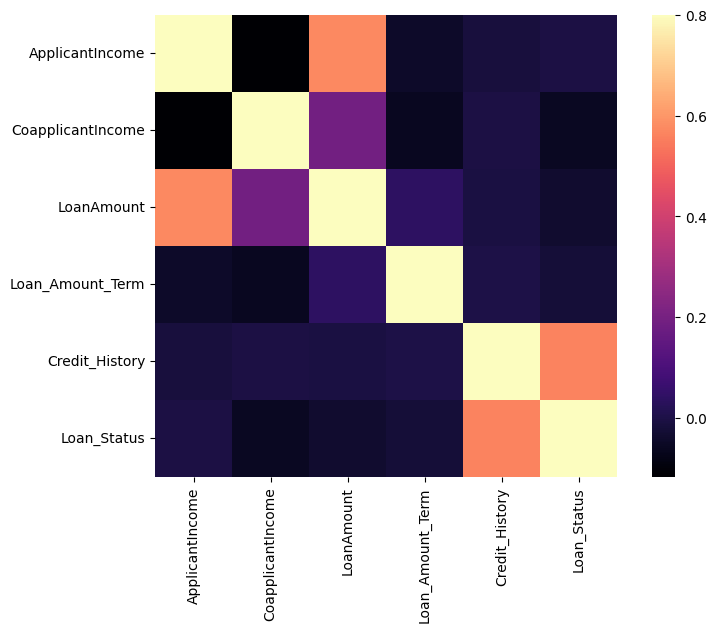

In [236]:
matrix = train.corr(numeric_only = True) 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="magma");

## Data Preprocessing - Dealing with Nulls

In [237]:
nulls = train.isnull().sum()
print(nulls)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [238]:
train = train.dropna()
nulls = train.isnull().sum()
print(nulls)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Now to encode all data as numerical data so that our models can work with them

In [239]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [240]:
#Drop Loan_ID:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

#Encode Gender M/F into 1/0:
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)
test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

#Encode Married Y/N into 1/0:
train['Married'].replace('Yes',1,inplace=True)
train['Married'].replace('No',0,inplace=True)
test['Married'].replace('Yes',1,inplace=True)
test['Married'].replace('No',0,inplace=True)

#Encode Dependents into numerical data:
train['Dependents'].replace('0',0,inplace=True)
test['Dependents'].replace('0',0,inplace=True)
train['Dependents'].replace('1',1,inplace=True)
test['Dependents'].replace('1',1,inplace=True)
train['Dependents'].replace('2',2,inplace=True)
test['Dependents'].replace('2',2,inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

#Encode Education Graduate/Not Graduate into 1/0
train['Education'].replace('Graduate',1,inplace = True)
train['Education'].replace('Not Graduate',0,inplace = True)
test['Education'].replace('Graduate',1,inplace = True)
test['Education'].replace('Not Graduate',0,inplace = True)

#Encode Self-Employed Y/N into 1/0:
train['Self_Employed'].replace('Yes',1,inplace = True)
train['Self_Employed'].replace('No',0,inplace = True)
test['Self_Employed'].replace('Yes',1,inplace = True)
test['Self_Employed'].replace('No',0,inplace = True)

#Encode Property_Area values Rural, Semiurban, Urban into 0/1/2:
train['Property_Area'].replace('Rural',0,inplace = True)
train['Property_Area'].replace('Semiurban',1,inplace = True)
train['Property_Area'].replace('Urban',2,inplace = True)
test['Property_Area'].replace('Rural',0,inplace = True)
test['Property_Area'].replace('Semiurban',1,inplace = True)
test['Property_Area'].replace('Urban',2,inplace = True)

train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

## Now that all data is numerical, let's double check the correlation matrix & see if we can drop some variables to increase model accuracy

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.349424    0.217510  -0.059245      -0.002761   
Married            0.349424  1.000000    0.386367  -0.001652       0.015674   
Dependents         0.217510  0.386367    1.000000  -0.028608       0.045754   
Education         -0.059245 -0.001652   -0.028608   1.000000       0.005085   
Self_Employed     -0.002761  0.015674    0.045754   0.005085       1.000000   
ApplicantIncome    0.032644  0.036717    0.131139   0.131172       0.170785   
CoapplicantIncome  0.156171  0.102950   -0.000318   0.074499      -0.001509   
LoanAmount         0.098975  0.183442    0.172780   0.172780       0.120389   
Loan_Amount_Term  -0.088704 -0.107504   -0.096361   0.102168      -0.034852   
Credit_History     0.022447  0.029095   -0.026651   0.056656      -0.023568   
Property_Area     -0.000204  0.038653    0.001191   0.055005      -0.050797   
Loan_Status        0.064504  0.112321    0.035428   

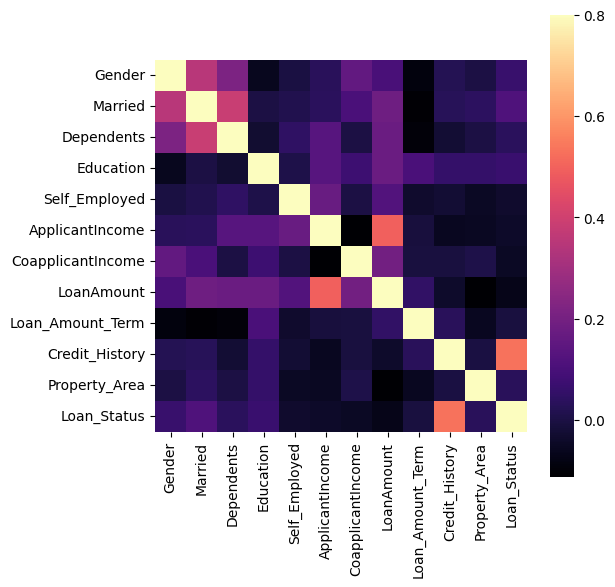

In [241]:
matrix = train.corr(numeric_only = True) 
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="magma");
print(matrix)

Handle Outliers

In [211]:
#import numpy as np
#train = train[train['CoapplicantIncome']<10000]

#for col in ['LoanAmount','ApplicantIncome']:
#    train[col] = train[col].apply(np.log1p)

Models

In [212]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [213]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']
#Note: The test csv file actually doesn't have a Loan Status column, so it's worthless as far as making predictions go. Instead, let's split our trianing data.
#X_test = test.drop('Loan_Status', axis = 1)
#y_test = test['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.34)

Accuracy: 0.82
Cross-Validation Scores: [0.79166667 0.8125     0.77083333 0.79166667 0.77083333 0.77083333
 0.83333333 0.85416667 0.79166667 0.85416667]
Mean Accuracy: 0.8041666666666668

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.48      0.62        50
           1       0.81      0.97      0.88       114

    accuracy                           0.82       164
   macro avg       0.85      0.73      0.75       164
weighted avg       0.83      0.82      0.80       164


Confusion Matrix:
[[ 24  26]
 [  3 111]]


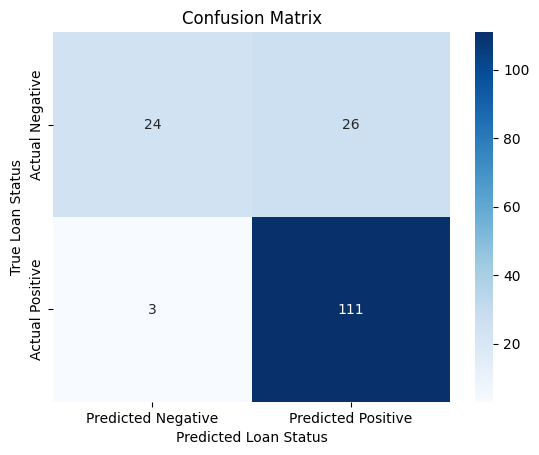

In [214]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100,learning_rate = 0.05, random_state=42)
bagging_adaboost_model = BaggingClassifier(base_estimator=adaboost_model, n_estimators=10, random_state=42)
adaboost_model.fit(X_train, y_train)
#bagging_adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
#y_pred = bagging_adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cv_scores = cross_val_score(adaboost_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Loan Status')
plt.ylabel('True Loan Status')
plt.show()

In [215]:
from xgboost import XGBClassifier

Accuracy: 0.77
Cross-Validation Scores: [0.77083333 0.72916667 0.72916667 0.75       0.75       0.75
 0.85416667 0.72916667 0.77083333 0.77083333]
Mean Accuracy: 0.7604166666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        50
           1       0.83      0.84      0.83       114

    accuracy                           0.77       164
   macro avg       0.73      0.72      0.72       164
weighted avg       0.77      0.77      0.77       164


Confusion Matrix:
[[30 20]
 [18 96]]
              Feature  Importance
9      Credit_History    0.416628
4       Self_Employed    0.078813
1             Married    0.075858
2          Dependents    0.072060
8    Loan_Amount_Term    0.060905
7          LoanAmount    0.056753
5     ApplicantIncome    0.052584
6   CoapplicantIncome    0.050737
10      Property_Area    0.050344
3           Education    0.049020
0              Gender    0.036298


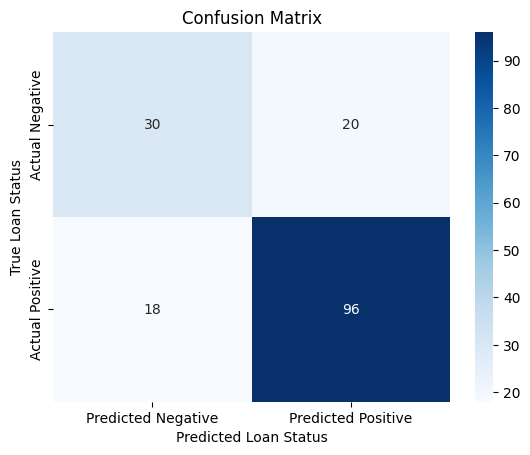

In [216]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cv_scores = cross_val_score(xgb_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#Feature Importances
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Loan Status')
plt.ylabel('True Loan Status')
plt.show()

In [217]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [218]:
#Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

cv_scores = cross_val_score(logreg_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))



Logistic Regression Accuracy: 0.81
Cross-Validation Scores: [0.79166667 0.8125     0.77083333 0.79166667 0.79166667 0.77083333
 0.83333333 0.85416667 0.77083333 0.8125    ]
Mean Accuracy: 0.7999999999999999


c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [219]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
cv_scores = cross_val_score(dt_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Decision Tree Accuracy: 0.70
Cross-Validation Scores: [0.72916667 0.72916667 0.72916667 0.625      0.77083333 0.70833333
 0.8125     0.70833333 0.8125     0.58333333]
Mean Accuracy: 0.7208333333333333


In [220]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
cv_scores = cross_val_score(rf_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Random Forest Accuracy: 0.81
Cross-Validation Scores: [0.79166667 0.79166667 0.77083333 0.77083333 0.79166667 0.8125
 0.8125     0.79166667 0.79166667 0.83333333]
Mean Accuracy: 0.7958333333333333


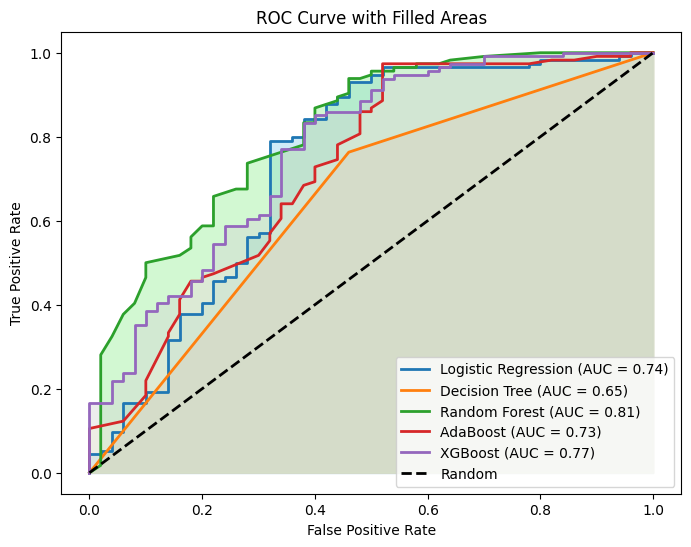

In [221]:
#ROC/AUC Curves
from sklearn.metrics import roc_curve, roc_auc_score

adaboost_probs = adaboost_model.predict_proba(X_test)[:, 1]
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

dt_probs = dt_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', linewidth=2)
plt.fill_between(logreg_fpr, logreg_tpr, color='skyblue', alpha=0.4)

plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})', linewidth=2)
plt.fill_between(dt_fpr, dt_tpr, color='lightcoral', alpha=0.4)

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linewidth=2)
plt.fill_between(rf_fpr, rf_tpr, color='lightgreen', alpha=0.4)

plt.plot(adaboost_fpr, adaboost_tpr, label=f'AdaBoost (AUC = {adaboost_auc:.2f})', linewidth=2)
plt.fill_between(adaboost_fpr, adaboost_tpr, color='lightyellow', alpha=0.4)

plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', linewidth=2)
plt.fill_between(xgb_fpr, xgb_tpr, color='lightgray', alpha=0.4)


plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Filled Areas')
plt.legend()
plt.show()
